<a href="https://colab.research.google.com/github/KDK-00/deeplearning/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 캐글의 타이타닉 튜토리얼

타이타닉은 1912년 3월 15일 빙산과 충돌한 다시는 일어나선 안될 선박 사고로, 2,224명의 승객, 승무원 중 1502명이 사망한 사건이다.

Titanic 데이터는 아래와 같이 구성되어 있다.

PassengerId: 탑승자 데이터 일련번호

Survived: 생존여부, 0 = 사망, 1 = 생존

Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석

Sex: 탑승자 성별

Name: 탑승자 이름

Age: 탑승자 나이

SibSp: 같이 탑승한 형제, 자매 또는 배우자 인원 수

Parch: 같이 탑승한 부모님 또는 자녀 인원 수

Ticket: 티켓 번호

Fare: 요금

Cabin: 선실 번호

Embarked: 탑승 항구, C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

# Get the file from your Google Drive
train_file_path = '/content/drive/My Drive/Colab Notebooks/data/titanic/train.csv'
test_file_path = '/content/drive/My Drive/Colab Notebooks/data/titanic/test.csv'




Mounted at /content/drive/


In [3]:
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)
PassengerId = test['PassengerId']
train_len = len(train)

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Train의 Null값

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Test의 Null값

In [6]:
train.shape, test.shape

((891, 12), (418, 11))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Train Data에 대한 Heatmap**

* train[['Survived', 'Age', 'SibSp', 'Parch', 'Pclass']]:

  'train'이라는 데이터프레임에서 특정 열들을 선택합니다.

  선택된 열: 'Survived'(생존 여부), 'Age'(나이), 'SibSp'(형제자매/배우자 수), 'Parch'(부모/자녀 수), 'Pclass'(객실 등급)

* .corr(): [링크 텍스트](https://)
  선택된 열들 간의 상관계수를 계산합니다.



* annot=True: 각 셀에 상관계수 값을 표시합니다.

* fmt='.2f': 상관계수 값을 소수점 둘째 자리까지 표시합니다.

* cmap='RdYlGn': 색상 맵을 설정합니다. 'RdYlGn'은 Red-Yellow-Green 색상 스펙트럼을 사용합니다.

* linewidths=0.2: 각 셀 사이의 선 두께를 0.2로 설정합니다.

* annot_kws={'size': 10}: 셀 안의 텍스트(상관계수 값) 크기를 10으로 설정합니다.





<Axes: >

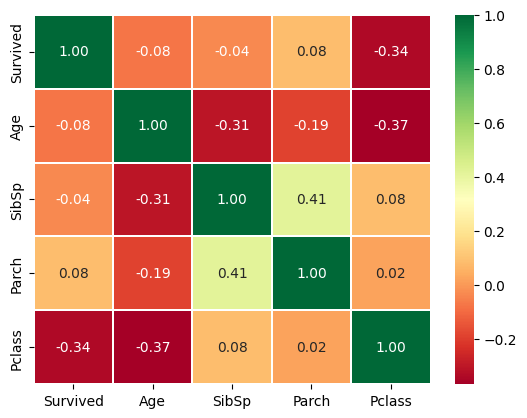

In [8]:
sns.heatmap(train[['Survived', 'Age', 'SibSp', 'Parch', 'Pclass']].corr(),
            annot=True,
            fmt='.2f',
            cmap='RdYlGn',
            linewidths=0.2,
            annot_kws={'size': 10}
            )



*   Survived와 Pclass 간 음의 상관 관계가 있고 이는 Pclass가 1등급에 가까울수록 생존률이 높음을 의미함
*   Age와 SibSp,Pclass 간 음의 상관 관계가 있고 이는 나이가 많아질수록 SibSp의 수는 줄어들고 Pclass가 1등급에 가까워짐을 의미함
*   SibSp와 Parch 간 양의 상관 관계가 있고 이는 SibSp가 증가할수록 Parch의 수도 증가함을 의미함



# Train and Test data 결합

In [9]:
data = pd.concat([train, test], axis=0).reset_index(drop=True)

data = data.fillna(np.nan)
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Feature Analysis

**Categorical Values**

변수들의 가장 기본적인 특징으로 먼저 분류한다

**Sex, Pclass, Embarked** 는 명목형 변수이다

**Sex**

In [10]:
pd.crosstab(train.Sex, train.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


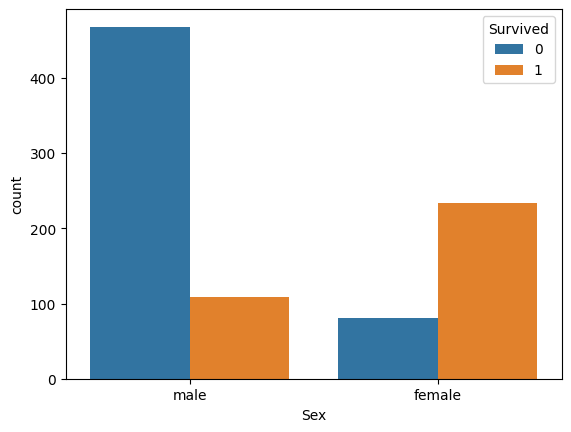

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
sns.countplot(x='Sex', hue='Survived', data=train)
plt.show()

In [12]:
print('여성의 비율: ', train['Sex'][train['Sex']=='female'].count() / train['Sex'].count())
print('남성의 비율: ', train['Sex'][train['Sex']=='male'].count() / train['Sex'].count())
print('여성의 생존률: ', train['Sex'][(train['Sex']=='female') & (train['Survived']==1)].count() / train['Sex'][train['Sex']=='female'].count())
print('남성의 생존률: ', train['Sex'][(train['Sex']=='male') & (train['Survived']==1)].count() / train['Sex'][train['Sex']=='male'].count())

여성의 비율:  0.35241301907968575
남성의 비율:  0.6475869809203143
여성의 생존률:  0.7420382165605095
남성의 생존률:  0.18890814558058924


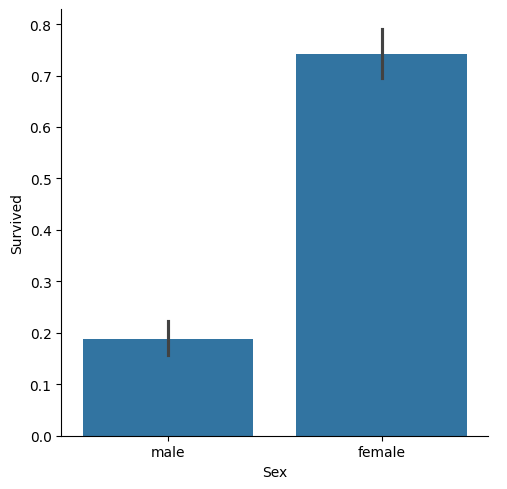

In [13]:
sns.catplot(x='Sex', y='Survived', data=train, kind='bar')
plt.show()

예상대로, 탑승자 중 **남성의 비율(64.8%**)이 **여성의 비율(35.2%)**보다 높은데

**여성의 생존률(74.2%)**이 **남성의 생존률(18.9%)**보다 높다

**Pclass**

좋은 등급의 승객일수록 생존률이 높을것이라고 예상되었다

실제로는 어떤 통계를 보여주는지 확인해보자

In [14]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

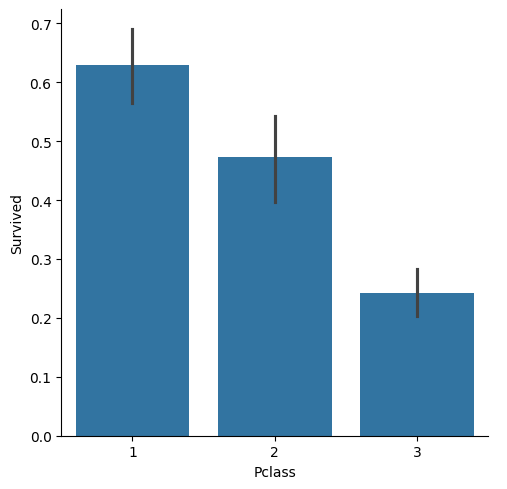

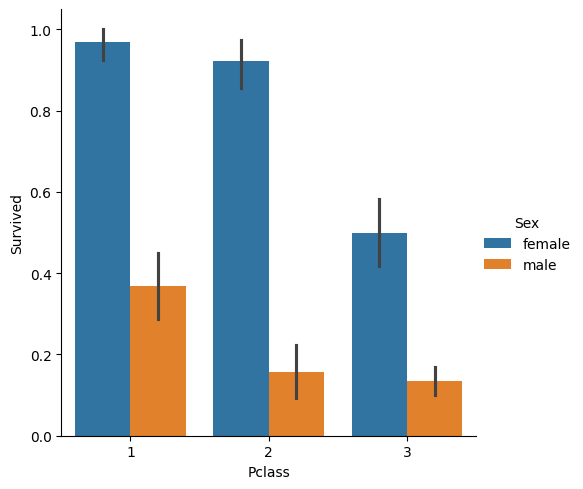

In [15]:
# g = sns.factorplot('Pclass', 'Survived', data=train, kind='bar')
# g.set_titles('Pclass vs Survived')
# g = sns.factorplot('Pclass', 'Survived', data=train, hue='Sex')
# g.set_titles('Sex: Pclass vs Survived')

g = sns.catplot(x = 'Pclass', y = 'Survived', data=train, kind='bar')
g.set_titles('Pclass vs Survived')

g = sns.catplot(x = 'Pclass', y = 'Survived', data=train, hue='Sex', kind = 'bar')
g.set_titles('Sex: Pclass vs Survived')

plt.show()

1등급 승객의 생존률이 가장 높고,
등급에 상관없이 여성의 생존률이 높으나

3등급에서의 여성의 생존률은 1, 2 등급에 비해 비교적 확연히 낮은 수치를 보이고 있다

**Embarked**

탑승한 항구가 생존률에 미치는 영향을 알아보자

In [16]:
train['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

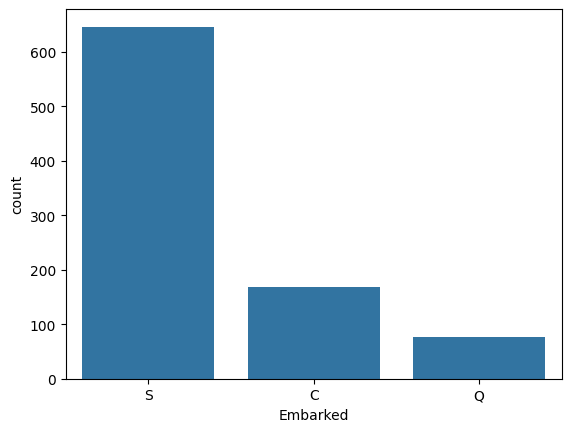

In [17]:
train['Embarked'] = train['Embarked'].fillna('S')

sns.countplot(x='Embarked', data=train)
plt.show()

Text(0.5, 1.0, 'Sex: Embarked vs Survived')

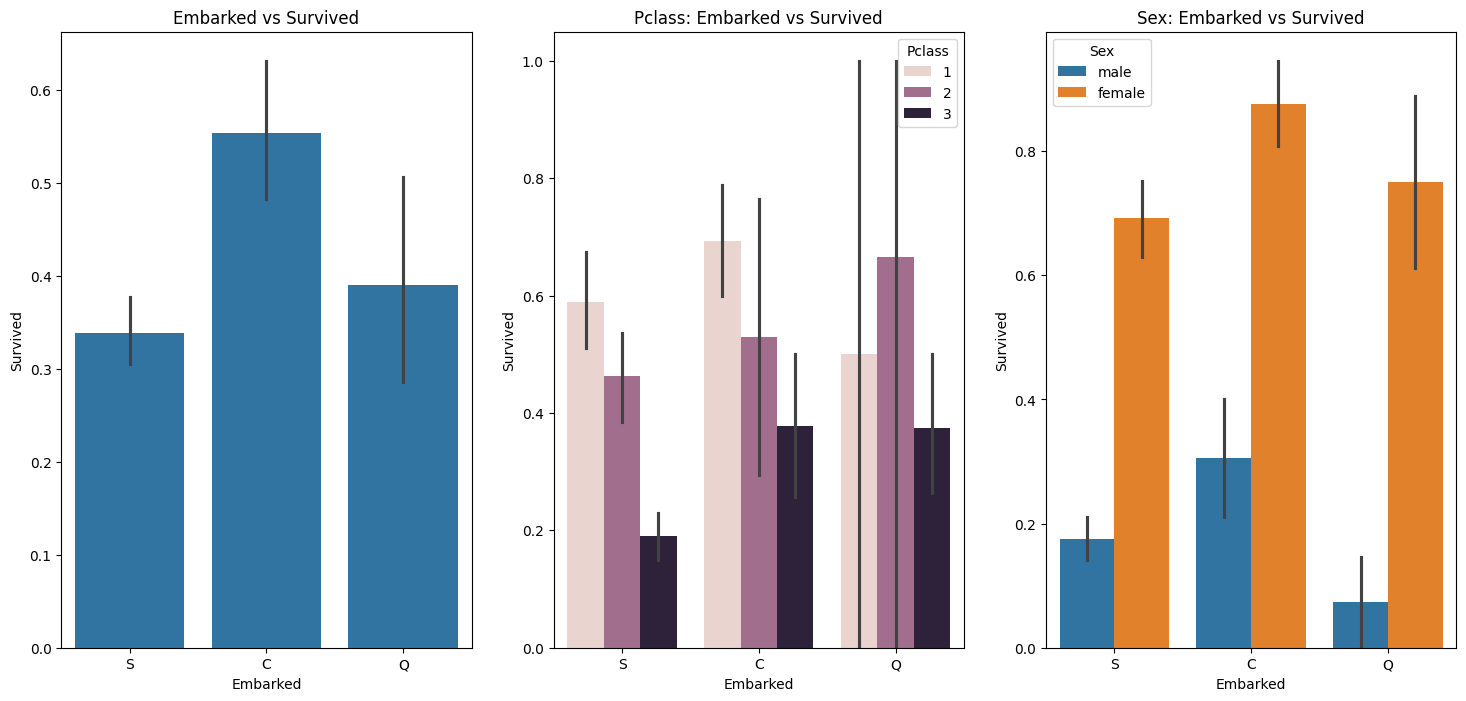

In [18]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))
sns.barplot(x = 'Embarked', y='Survived', data=train, ax=ax[0])
ax[0].set_title('Embarked vs Survived')
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train, ax=ax[1])
ax[1].set_title('Pclass: Embarked vs Survived')
sns.barplot(x='Embarked',y= 'Survived', hue='Sex', data=train, ax=ax[2])
ax[2].set_title('Sex: Embarked vs Survived')



1.   S항구의 탑승한 승객의 수가 월등히 많은데, C에서 탑승한 승객의 생존률이 가장 높게 나타남

2.   일반적으로 1등급 승객의 생존률이 높은데, Q항구에서 탑승한 승객의 경우에는 2등급 승객의 생존률이 가장 높음

3.    어떤 항구에서 탑승하던 여성의 생존률이 더 높음   


2등급 승객의 생존률이 높게 나타난 것은 2등급에 탑승한 여성승객의 수가 많아서일 가능성이 있음

In [19]:
pd.crosstab([train.Embarked, train.Pclass],
            train.Sex,
            margins=True).style.background_gradient(cmap='spring')

Q항구에서 1,2 등급 생존률이 각각 0.5,0.66 이 나온 이유는 탑승자 수가 2,3명으로 매우 적어서 임을 알 수 있다

**Numerical Values**

연속/이산형 변수들에 대해 알아본다

**SibSp, Parch, Fare** 가 여기에 속한다

**SibSp**

In [20]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [21]:
train[train['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


SibSp == 8 인 경우

승객들의 Age, Cabin 값이 전부 NaN 으로 나타나고, Name, Sex를 제외한 모든 값이 같게 나타난다

이 데이터들은 이상치로 판단되어 드롭한다

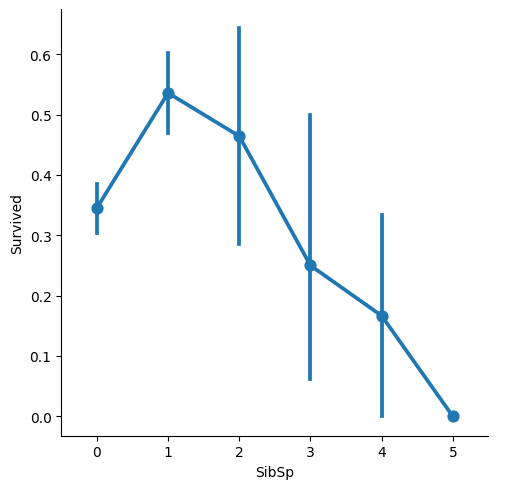

In [22]:
train = train.drop(train[train['SibSp']==8].index, axis=0).reset_index(drop=True)

sns.catplot(x='SibSp', y='Survived', data=train, kind = 'point')

SibSp가 1또는 2인 경우가 생존률이 높고
많아질 수록 생존률이 낮아진다

**Parch**

In [23]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     73
5      5
3      5
4      4
6      1
Name: count, dtype: int64

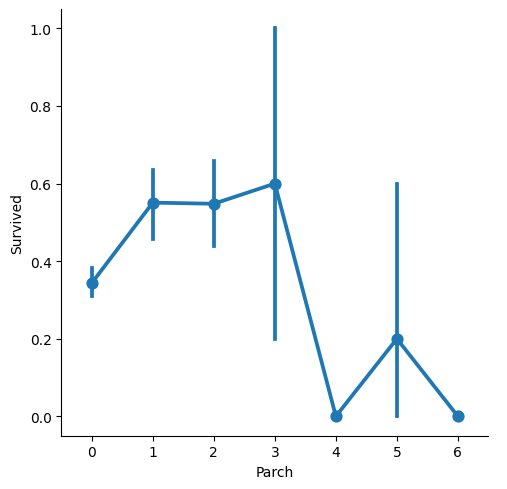

In [24]:
sns.catplot(x='Parch', y='Survived', data=train, kind = 'point')

SibSp와 유사하게 Parch가 1,2,3명인 경우의 생존률이 높고, 많아질수록 생존률이 낮아지는 경향을 보인다

**Fare**

In [25]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

print(f'가장 높은 요금 : {data.Fare.max()}')
print(f'가장 낮은 요금 : {data.Fare.min()}')
print(f'요금의 평균: {data.Fare.mean()}')

가장 높은 요금 : 512.3292
가장 낮은 요금 : 0.0
요금의 평균: 33.28108563789152


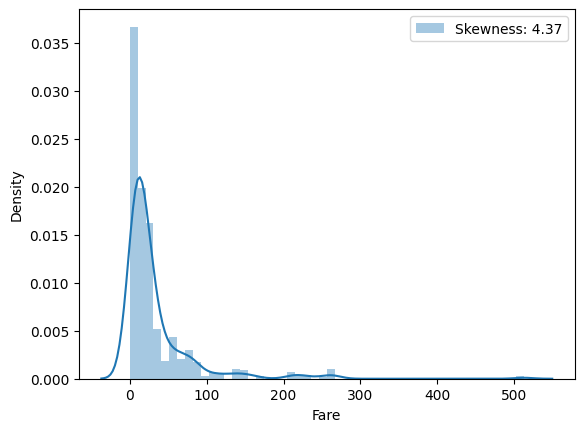

In [26]:
g = sns.distplot(data['Fare'], label='Skewness: %.2f'%(data['Fare'].skew()))
g.legend(loc='best')

데이터 편향을 보이는것은 ML모델 형성에 안좋은 영향을 미칠 수 있다

Fare 전체에 log를 취하여 Skewness(비대칭도)를 낮추어 주겠다

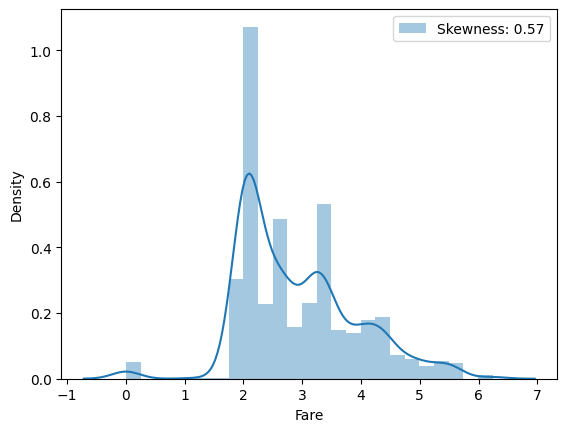

In [27]:
data['Fare'] = data['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

g = sns.distplot(data['Fare'], label='Skewness: %.2f'%(data['Fare'].skew()))
g.legend(loc='best')

데이터의 분포는 그대로 확인 가능하되, 비대칭도가 크게 줄었다

**Filling NaN(Age)**

위에서 확인한 바로 Age는 train,test를 합쳐 총 263개의 Null 값이 존재한다

Age가 어떤 Feature들과 연관이 있는지 확인한다

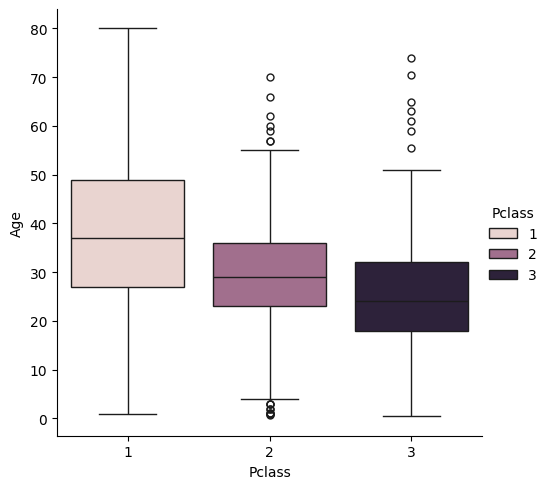

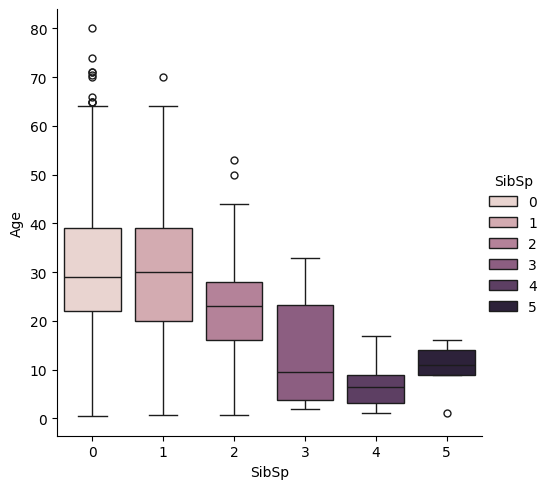

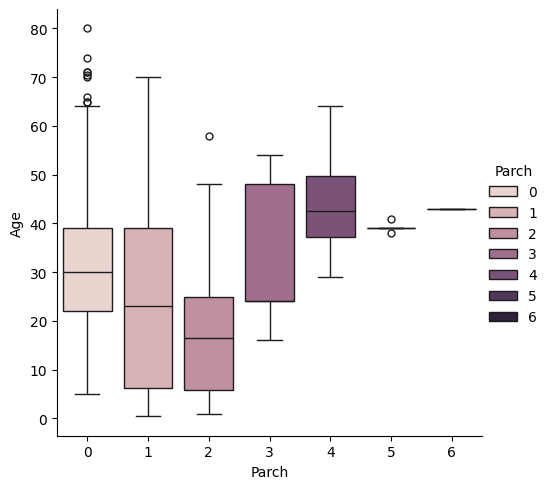

In [28]:
sns.catplot(x='Pclass', y='Age',hue='Pclass', data=train, kind='box')
sns.catplot(x='SibSp', y='Age',hue='SibSp', data=train, kind='box')
sns.catplot(x='Parch', y='Age',hue='Parch', data=train, kind='box')



1.   Pclass가 높아짐에 따라 나이가 증가한다

2.   SibSp가 증가함에 따라 나이가 어려지다가 5명 이상부터 다시 많아진다. 하지만 5,6명일 때의 데이터가 적어 확신할 수 없다

3.   Parch가 증가함에 따라 나이가 어려지다가 3명이상부터 다시 많아진다. 이 역시 5,6,9명 의 데이터가 적어 확신할 수 없다



<Axes: >

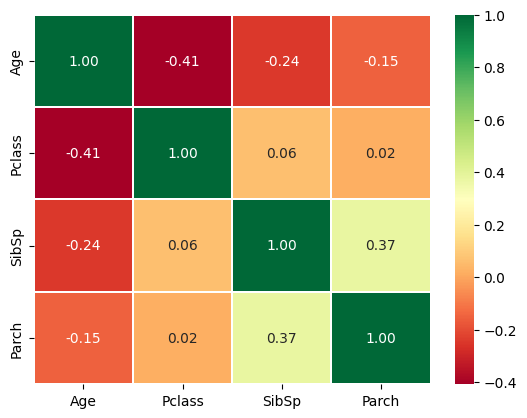

In [29]:
sns.heatmap(data[['Age', 'Pclass', 'SibSp', 'Parch']].corr(),
            annot=True,
            fmt='.2f',
            cmap='RdYlGn',
            linewidths=0.2,
            annot_kws={'size': 10}
            )

**SibSp, Parch, Pclass** 는 Age 와 음의 상관관계를 갖는다

여기서 상관계수가 높은 **SibSp, Pclass**를 이용하여 **Age**의 결측값을 채우도록 하자

또한 **SibSp**와 **Parch**의 상관계수가 높게나타나기 때문에 FamilySize로 결합 시키려고한다

In [31]:
index_NaN_age = list(data['Age'][data['Age'].isnull()].index)

for i in index_NaN_age:
    age_med = data['Age'].median()
    age_pred = data['Age'][((data['SibSp'] == data.iloc[i]['SibSp']) & (data['Pclass'] == data.iloc[i]['Pclass']))].median()
    if np.isnan(age_pred):
        data['Age'].iloc[i] = age_med
    else:
        data['Age'].iloc[i] = age_pred

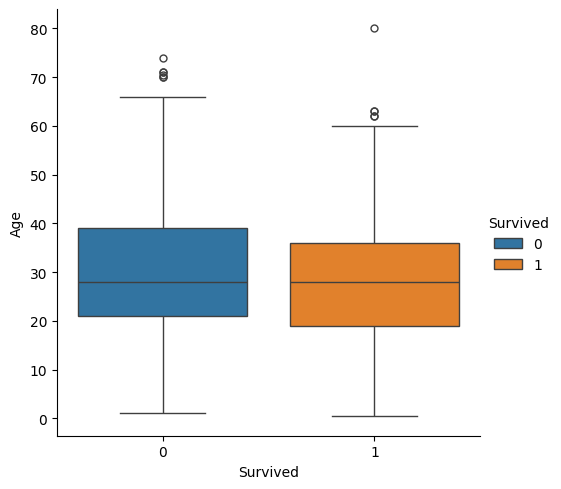

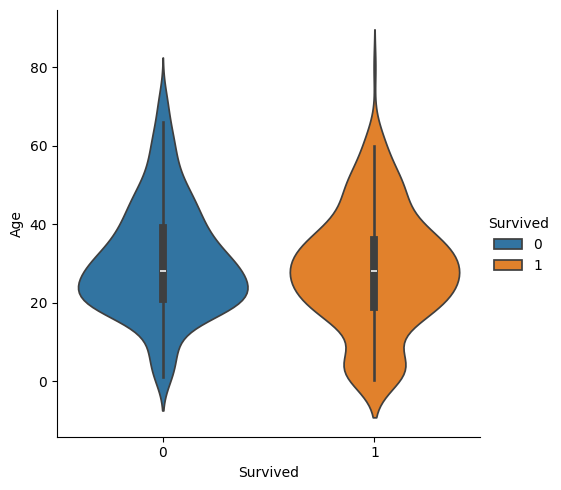

In [37]:
sns.catplot(x = 'Survived', y='Age',hue = 'Survived', data = train, kind='box')
sns.catplot(x='Survived', y='Age', hue = 'Survived', data = train, kind='violin')

나이와 생존여부의 중간값에는 큰 차이가 없음을 알 수 있다

하지만 0~5세 정도의 나이에서 생존률이 높음을 확인 할 수 있다